In [9]:
import level_generator
import gym
import matplotlib.pyplot as plt
import a_star
from pyswip import Prolog
import time
import IPython.display as display

des_file = level_generator.create_level(width=10,height=10,num_cloud=0)

kb = Prolog()
env = gym.make('MiniHack-Skill-Custom-v0',
               character="sam-hum-neu-mal",
               observation_keys=('screen_descriptions','inv_strs','blstats','message','pixel'),
               des_file=des_file)

obs = env.reset()

(43, 11)
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
searching
s

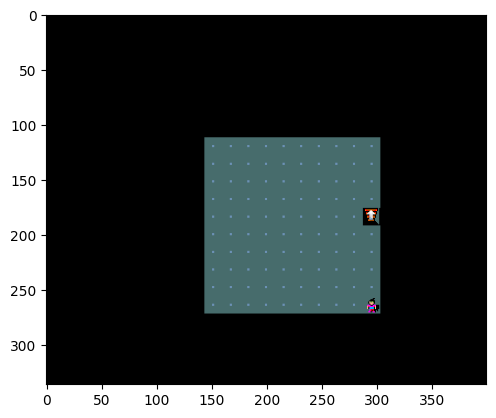

In [10]:
obs = env.reset()
player_pos = (obs['blstats'][0], obs['blstats'][1])
print(player_pos)
states = []
states.append(obs['pixel'][:,400:800])

reached = False
a_star.look_around(kb,obs)
print(list(kb.query('position(apple,commestible,X,Y)')))


for i in range(10):
    #a_star.look_around(kb,obs)
    apple_info = list(kb.query('position(apple,commestible,X,Y)'))
    print(apple_info)
    apple_pos = (apple_info[0]['X'], apple_info[0]['Y'])
    print(apple_pos)
    if player_pos == apple_pos:
        break
    
    action_id = a_star.get_direction(apple_pos,player_pos,(10,10), kb)
    obs,_,_,_ = env.step(action_id)
    player_pos = (obs['blstats'][0], obs['blstats'][1])
    print(f'player pos: {player_pos}')
    states.append(obs['pixel'][:,400:800])

image = plt.imshow(obs['pixel'][:,400:800])



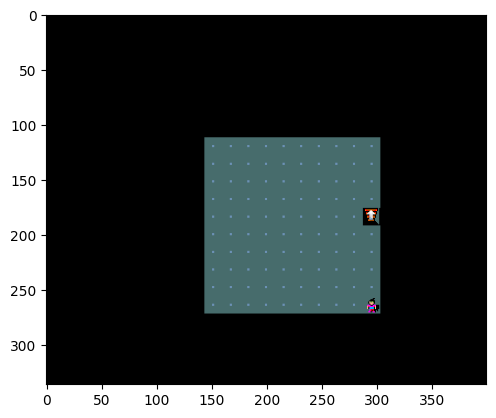

In [11]:
image = plt.imshow(obs['pixel'][:,400:800])
for state in states:
    time.sleep(0.5)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(state)
time.sleep(0.5)
display.display(plt.gcf())
display.clear_output(wait=True)

In [12]:
from nle.env.base import FULL_ACTIONS
from nle import _pynethack, nethack
MH_FULL_ACTIONS = list(FULL_ACTIONS)
MH_FULL_ACTIONS.remove(nethack.MiscDirection.UP)
print(MH_FULL_ACTIONS)

[<CompassDirection.N: 107>, <CompassDirection.E: 108>, <CompassDirection.S: 106>, <CompassDirection.W: 104>, <CompassDirection.NE: 117>, <CompassDirection.SE: 110>, <CompassDirection.SW: 98>, <CompassDirection.NW: 121>, <CompassDirectionLonger.N: 75>, <CompassDirectionLonger.E: 76>, <CompassDirectionLonger.S: 74>, <CompassDirectionLonger.W: 72>, <CompassDirectionLonger.NE: 85>, <CompassDirectionLonger.SE: 78>, <CompassDirectionLonger.SW: 66>, <CompassDirectionLonger.NW: 89>, <MiscDirection.DOWN: 62>, <MiscDirection.WAIT: 46>, <MiscAction.MORE: 13>, <Command.ADJUST: 225>, <Command.APPLY: 97>, <Command.ATTRIBUTES: 24>, <Command.CALL: 67>, <Command.CAST: 90>, <Command.CHAT: 227>, <Command.CLOSE: 99>, <Command.DIP: 228>, <Command.DROP: 100>, <Command.DROPTYPE: 68>, <Command.EAT: 101>, <Command.ENGRAVE: 69>, <Command.ENHANCE: 229>, <Command.ESC: 27>, <Command.FIGHT: 70>, <Command.FIRE: 102>, <Command.FORCE: 230>, <Command.INVENTORY: 105>, <Command.INVENTTYPE: 73>, <Command.INVOKE: 233>, <Co

In [13]:
print(MH_FULL_ACTIONS[0])

CompassDirection.N


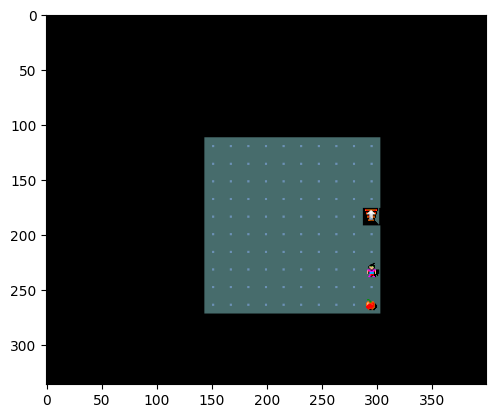

In [21]:
obs, reward, done, info = env.step(0)
image = plt.imshow(obs['pixel'][:,400:800])

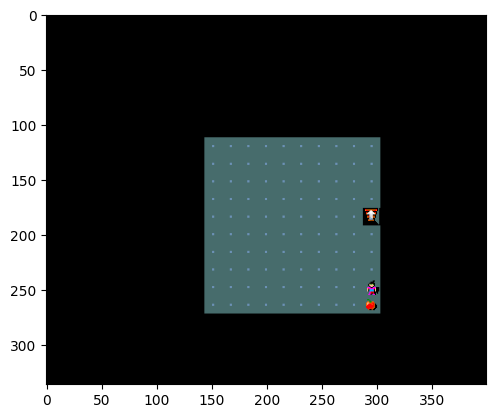

In [20]:
obs, reward, done, info = env.step(2)
image = plt.imshow(obs['pixel'][:,400:800])